In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import os

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('good_exp_norm.csv')
df

,delta_weight,Temperature [C]_mean,pH [-]_mean,Salinity [ppt]_mean,Concentration of feed solution (g/L)_mean,Volume of feed solution given (L)_mean,Feed not fed DM (g/day)_mean,Feed fed DM (g/day)_mean,Actual feed ration given (% BW)_mean,Tank volume (L)_mean,Weight wet sieve [g]_mean,Water drained [l]_mean,name
0,0.041145,0.250000,0.629630,0.516908,0.657594,0.333333,0.319149,0.379843,1.000000,0.333333,1.000000,0.5,X031a DxFx30 SR - XL
1,1.000000,0.170455,0.000000,0.000000,0.225912,0.093750,0.478723,0.001336,0.018519,0.013333,0.499248,0.5,X029j DxFx25 SR
2,0.695886,0.227273,0.995370,0.565217,0.816549,0.808333,0.000000,1.000000,0.592593,1.000000,0.989519,1.0,X164a D30Fe11 SR - IBC
3,0.450805,1.000000,0.851852,0.671498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,X007b D1F21 SR
4,0.436494,0.693182,0.250000,0.811594,0.000000,0.000000,0.000000,0.000000,0.962963,0.013333,0.000000,0.0,X007b1 D1F13 SR
5,0.132379,0.693182,0.203704,0.922705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,X007b2 D1F21 SR
6,0.000000,0.136364,0.703704,0.661836,1.000000,0.375000,1.000000,0.508685,0.962963,0.333333,0.999274,0.5,X030a DxFx30 SR - XL
7,0.434705,0.000000,0.907407,0.710145,0.000000,0.093750,0.000000,0.000000,0.000000,0.013333,0.994894,1.0,X040a D2Fx50 SR
8,0.339893,0.068182,0.898148,0.613527,0.000000,0.093750,0.000000,0.000000,0.000000,0.013333,0.994894,1.0,X040b D2Fx50 SR
9,0.429338,0.613636,1.000000,1.000000,0.293958,1.000000,0.093085,0.439015,0.833333,0.320000,0.989519,1.0,X175a D30Fe1 VA-RB - XL


In [5]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = 10000#*abs(corr_r) #IF YOU WANT THE CIRCLES TO CHANGE SIZE, UNCOMMENT THE ABS HERE
    ax.scatter([.5], [.5], 
               marker_size, 
               [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size =  5+40*abs(corr_r)
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=30)

AxesSubplot(0.0357738,0.900203;0.0823506x0.0808633)
AxesSubplot(0.131684,0.900203;0.0823506x0.0808633)
AxesSubplot(0.227594,0.900203;0.0823506x0.0808633)
AxesSubplot(0.323504,0.900203;0.0823506x0.0808633)
AxesSubplot(0.419414,0.900203;0.0823506x0.0808633)
AxesSubplot(0.515324,0.900203;0.0823506x0.0808633)
AxesSubplot(0.611235,0.900203;0.0823506x0.0808633)
AxesSubplot(0.707145,0.900203;0.0823506x0.0808633)
AxesSubplot(0.803055,0.900203;0.0823506x0.0808633)
AxesSubplot(0.898965,0.900203;0.0823506x0.0808633)
AxesSubplot(0.0357738,0.804807;0.0823506x0.0808633)
AxesSubplot(0.131684,0.804807;0.0823506x0.0808633)
AxesSubplot(0.227594,0.804807;0.0823506x0.0808633)
AxesSubplot(0.323504,0.804807;0.0823506x0.0808633)
AxesSubplot(0.419414,0.804807;0.0823506x0.0808633)
AxesSubplot(0.515324,0.804807;0.0823506x0.0808633)
AxesSubplot(0.611235,0.804807;0.0823506x0.0808633)
AxesSubplot(0.707145,0.804807;0.0823506x0.0808633)
AxesSubplot(0.803055,0.804807;0.0823506x0.0808633)
AxesSubplot(0.898965,0.804807

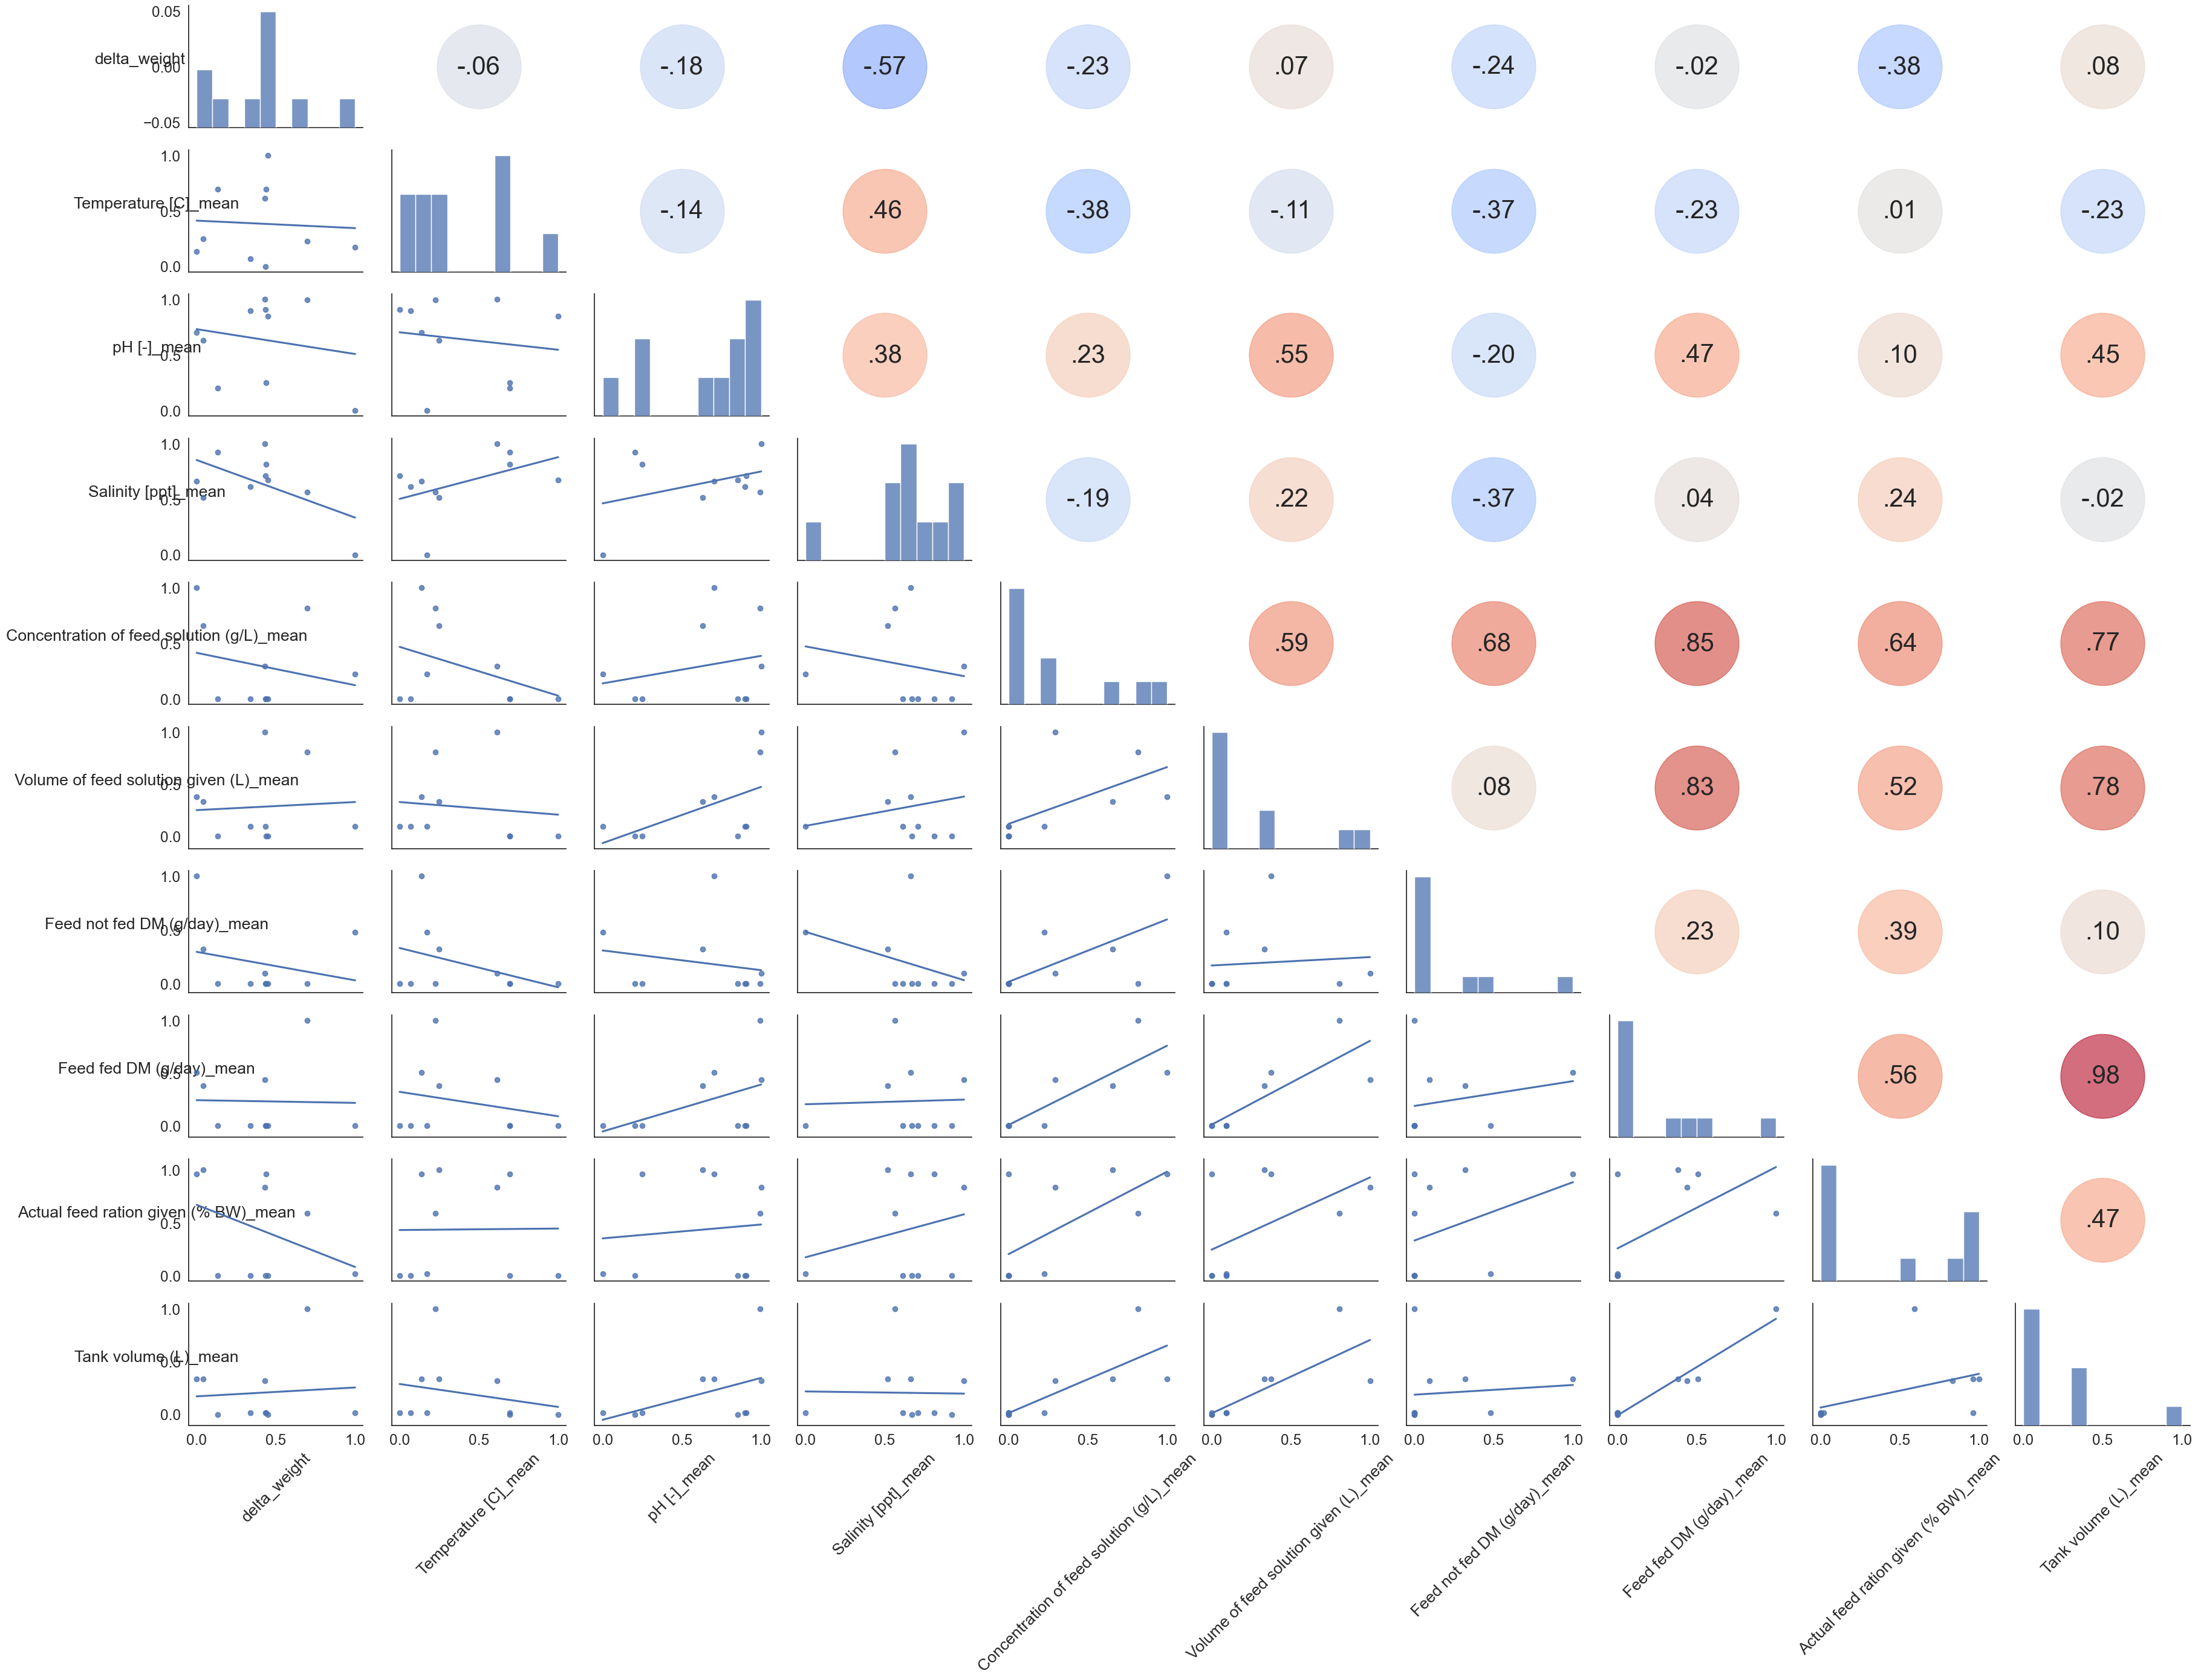

In [35]:
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df.iloc[:, :-3], aspect=1.4, diag_sharey=False)
for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 45)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
g.map_lower(sns.regplot, fit_reg=True, ci=False) # IF THE FIT LINE ISN'T WANTED, SET FIT_REG TO FALSE
g.map_diag(sns.histplot, bins=10)
g.map_upper(corrdot)
plt.savefig('pearson_corr.png')
plt.show()